In [ ]:
import cv2
import os
from keras.models import load_model
import numpy as np
import time
from google.colab.patches import cv2_imshow

In [ ]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model

In [ ]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(100,100),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 64
TS=(100,100)
train_batch= generator('/content/drive/MyDrive/Adv_final_project/train',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
print(SPE)

Found 1448 images belonging to 2 classes.
22


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,100,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_batch,epochs=5,steps_per_epoch=SPE )


Epoch 1/5
22/22 [==============================] - 337s 15s/step - loss: 2.6764 - accuracy: 0.5730
Epoch 2/5
22/22 [==============================] - 105s 5s/step - loss: 0.5075 - accuracy: 0.7471
Epoch 3/5
22/22 [==============================] - 105s 5s/step - loss: 0.3592 - accuracy: 0.8533
Epoch 4/5
22/22 [==============================] - 105s 5s/step - loss: 0.2293 - accuracy: 0.9140
Epoch 5/5
22/22 [==============================] - 105s 5s/step - loss: 0.1531 - accuracy: 0.9444


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 96, 96, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 94, 94, 64)      

In [ ]:
model.save("/content/drive/MyDrive/Adv_final_project/saved_model.h5")

Testing

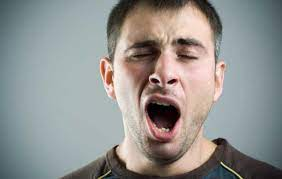

In [ ]:
img2=cv2.imread("/content/download.jpg")
cv2_imshow(img2)

In [ ]:
frame=cv2.resize(img2,(100,100))
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(100, 100)

In [ ]:
test=np.array(gray)

In [ ]:
test=np.reshape(test,(1,100,100,1))

In [ ]:
res=model.predict(test)
if res[0][0]>res[0][1]:
  print("The person is attentive")
else:
  print("The person is not attentive and is yawning")

The person is not attentive and is yawning


Loading the model and testing

In [ ]:
test_model=load_model("/content/saved_model.h5")

In [ ]:
res=test_Model.predict(test)

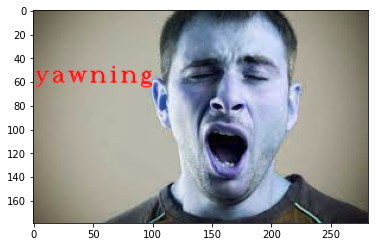

In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
if res[0][0]>res[0][1]:
  s="attentive"
else:
  s="yawning"
cv2.putText(img2,s,(0,60), font, 1,(255,0,0),1,cv2.LINE_AA)
  
plt.imshow(img2)

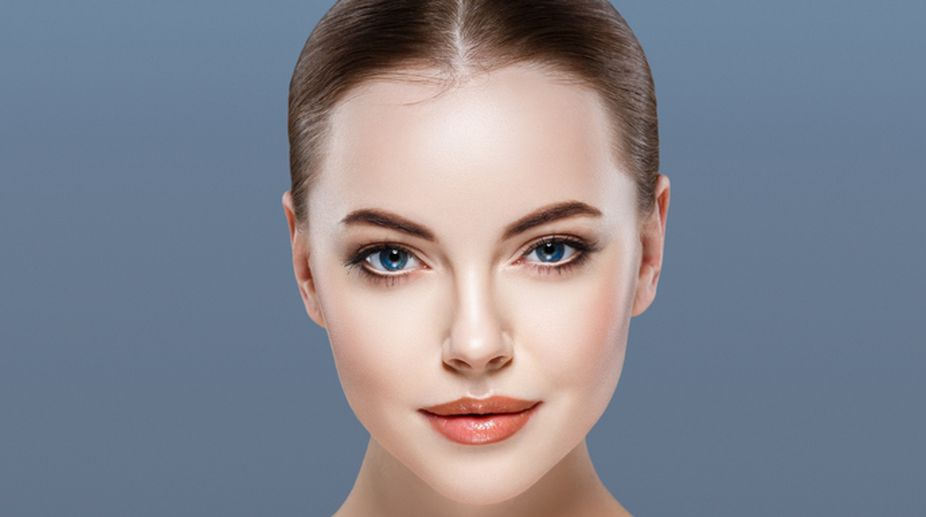

In [ ]:
img_test=cv2.imread("/content/test.jpg")
cv2_imshow(img_test)

In [ ]:
frame=cv2.resize(img_test,(100,100))
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
test=np.array(gray)
test=np.reshape(test,(1,100,100,1))

In [ ]:
res=test_Model.predict(test)

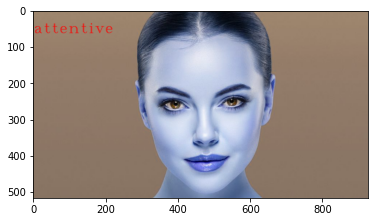

In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
if res[0][0]>res[0][1]:
  s="attentive"
else:
  s="yawning"
cv2.putText(img_test,s,(0,60), font, 2,(255,0,0),1,cv2.LINE_AA)
  
plt.imshow(img_test)